In [1]:
from __future__ import print_function
import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')
from __future__ import division
import matplotlib.pyplot as plt
#plt.rc('font', family='Arial')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set(font='Arial')
from sigr.parse_log import parse_log
from sigr.module import Module, Load, Init
import mxnet as mx
import sigr.data.csl as csl
import os
from sigr import CACHE, Context
import joblib as jb
from nose.tools import assert_equal
from time import time
from sigr import constant
from sigr.evaluation import CrossValEvaluation, Exp
from sigr.data import Preprocess


def get_accuracies(crossval_type, exps, folds):
    from IPython.display import display
    acc = []
    with Context(parallel=True):
        evaluation = CrossValEvaluation(crossval_type=crossval_type, batch_size=1000)
        for fold in folds:
            acc.append(evaluation.compare(exps, fold))
    return acc

In [2]:
warmup = [69, 72, 79, 80, 87, 99]
nowarmup = [f for f in range(250) if f not in warmup]
acc = np.empty(250)
acc[nowarmup] = get_accuracies(
    'intra-session',
    [Exp(name='S1', dataset=csl, vote=-1,
         dataset_args=dict(preprocess=Preprocess.parse('(csl-bandpass,csl-cut,median)')),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='.cache/sigr-intra-session-%d-v957.37/model-0014.params'))],
    folds=nowarmup)
acc[warmup] = get_accuracies(
    'intra-session',
    [Exp(name='S1', dataset=csl, vote=-1,
         dataset_args=dict(preprocess=Preprocess.parse('(csl-bandpass,csl-cut,median)')),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='.cache/sigr-intra-session-%d-v957.37.2/model-0014.params'))],
    folds=warmup)
df = pd.DataFrame(100 * np.array(acc).reshape(5, 5, 10).mean(axis=2),
                  columns=['S1', 'S2', 'S3', 'S4', 'S5'],
                  index=['A', 'B', 'C', 'D', 'E'])
print(df.iloc[:5, :5].as_matrix().mean(), df.iloc[:5, :5].as_matrix().std())
df['Avg'] = df.iloc[:, :5].mean(axis=1)
df['Std'] = df.iloc[:, :5].std(axis=1)
df.round(1)

95.4168888889 2.84045362014


,S1,S2,S3,S4,S5,Avg,Std
A,91.9,97.0,97.8,99.3,99.3,97.0,3.1
B,92.6,96.3,94.8,92.2,95.6,94.3,1.8
C,92.6,96.3,95.9,93.7,90.0,93.7,2.6
D,94.4,99.3,98.5,89.9,97.8,96.0,3.9
E,93.7,97.4,98.9,97.4,93.0,96.1,2.6


In [4]:
acc = get_accuracies(
    'intra-session',
    [Exp(name='S1', dataset=csl, vote=-1,
         dataset_args=dict(preprocess=Preprocess.parse('(csl-bandpass,csl-cut,median)')),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='.cache/sigr-csl-intra-session-%d-v957.51/model-0014.params'))],
    folds=list(range(250)))
df = pd.DataFrame(100 * np.array(acc).reshape(5, 5, 10).mean(axis=2),
                  columns=['S1', 'S2', 'S3', 'S4', 'S5'],
                  index=['A', 'B', 'C', 'D', 'E'])
print(df.iloc[:5, :5].as_matrix().mean(), df.iloc[:5, :5].as_matrix().std())
df['Avg'] = df.iloc[:, :5].mean(axis=1)
df['Std'] = df.iloc[:, :5].std(axis=1)
df.round(1)

95.965037037 2.57416820078


,S1,S2,S3,S4,S5,Avg,Std
A,92.2,97.8,98.1,99.6,98.9,97.3,2.9
B,94.1,97.0,95.6,93.3,95.6,95.1,1.4
C,95.2,96.7,96.7,94.1,90.7,94.7,2.5
D,93.7,98.5,98.5,90.2,97.8,95.8,3.7
E,96.3,98.1,99.3,97.4,93.7,97.0,2.1


In [2]:
acc = get_accuracies(
    'intra-session',
    [Exp(name='S1', dataset=csl, vote=-1,
         dataset_args=dict(preprocess=Preprocess.parse('(csl-bandpass,csl-cut,median)')),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7, num_filter=64),
                  params='.cache/sigr-csl-intra-session-%d-v958.5.1/model-0014.params'))],
    folds=np.arange(250))
df = pd.DataFrame(100 * np.array(acc).reshape(5, 5, 10).mean(axis=2),
                  columns=['S1', 'S2', 'S3', 'S4', 'S5'],
                  index=['A', 'B', 'C', 'D', 'E'])
print(df.iloc[:5, :5].as_matrix().mean(), df.iloc[:5, :5].as_matrix().std())
df['Avg'] = df.iloc[:, :5].mean(axis=1)
df['Std'] = df.iloc[:, :5].std(axis=1)
df.round(1)

96.7057777778 2.34922374711


,S1,S2,S3,S4,S5,Avg,Std
A,93.7,97.8,98.1,98.9,99.6,97.6,2.3
B,96.3,97.0,97.0,95.9,97.0,96.7,0.5
C,97.8,97.0,96.3,94.8,91.5,95.5,2.5
D,94.8,98.5,99.3,89.9,98.5,96.2,3.9
E,97.0,98.5,99.3,98.1,94.8,97.6,1.7


In [3]:
acc = get_accuracies(
    'inter-session',
    [Exp(dataset=csl, vote=-1,
         dataset_args=dict(preprocess=Preprocess.parse('(csl-bandpass,csl-cut,median)')),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='.cache/sigr-inter-session-%d-v957.36.5/model-0028.params')),
     Exp(dataset=csl, vote=-1,
         dataset_args=dict(preprocess=Preprocess.parse('(csl-bandpass,csl-cut,median)')),
         Mod=dict(num_gesture=27,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='.cache/sigr-csl-inter-session-%d-v958.2/model-0028.params')),
     Exp(dataset=csl, vote=-1,
         dataset_args=dict(preprocess=Preprocess.parse('(csl-bandpass,csl-cut,median)')),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7, num_filter=64),
                  params='.cache/sigr-inter-session-%d-v958.4.1/model-0014.params')),
     Exp(dataset=csl, vote=-1,
         dataset_args=dict(preprocess=Preprocess.parse('(csl-bandpass,csl-cut,median)')),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='.cache/sigr-inter-session-%d-v957.36.3/model-0028.params')),
     Exp(dataset=csl, vote=-1,
         dataset_args=dict(preprocess=Preprocess.parse('(csl-bandpass,csl-cut,median)')),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='.cache/sigr-inter-session-%d-v957.36.4/model-0028.params')),
     Exp(dataset=csl, vote=-1,
         dataset_args=dict(preprocess=Preprocess.parse('(csl-bandpass,csl-cut)')),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='.cache/sigr-inter-session-%d-v957.33/model-0001.params'))],
    folds=list(range(25)))
df = pd.DataFrame(np.hstack([np.array([60.6, 73.0, 62.3, 53.3, 45.3]).reshape(-1, 1),
                             100 * np.array(acc).reshape(5, 5, 6).mean(axis=1)]),
                  columns=['Baseline', 'ConvNet', 'No AdaBN', '64', 'No pretrain', 'No pretrain or balance', 'No median'],
                  index=['A', 'B', 'C', 'D', 'E'])
df.loc['Avg', :] = df.iloc[:5,:].mean(axis=0)
df.round(1)

,Baseline,ConvNet,No AdaBN,64,No pretrain,No pretrain or balance,No median
A,60.6,85.9,69.9,87.7,82.2,78.6,69.2
B,73.0,86.0,71.3,87.9,85.8,83.6,79.1
C,62.3,69.5,61.2,72.1,69.6,67.8,68.1
D,53.3,81.2,59.4,80.0,76.9,71.8,64.3
E,45.3,82.0,51.8,83.6,80.2,74.2,66.2
Avg,58.9,80.9,62.7,82.3,78.9,75.2,69.4


## 一些其它实验

In [35]:
acc = get_accuracies(
    'intra-session',
    [Exp(name='S1', dataset=csl, vote=-1,
         dataset_args=dict(cut=Cut.parse('peak-512'), bandstop=False),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='../.cache/sigr-intra-session-%d-v957.16/model-0060.params'))],
     folds=list(range(250)))
df = pd.DataFrame(np.array(acc).reshape(5, 5, 10).mean(axis=2),
                  columns=['S1', 'S2', 'S3', 'S4', 'S5'],
                  index=['A', 'B', 'C', 'D', 'E'])

In [47]:
print(df.iloc[:5, :5].as_matrix().mean(), df.iloc[:5, :5].as_matrix().std())
df['Avg'] = df.iloc[:, :5].mean(axis=1)
df['Std'] = df.iloc[:, :5].std(axis=1)
df

0.959354074074 0.0280934479813


,S1,S2,S3,S4,S5,Avg,Std
A,0.940741,0.959259,0.988889,0.992593,0.966667,0.969630,0.021501
B,0.937037,0.970370,0.974074,0.959259,0.970370,0.962222,0.015135
C,0.944444,0.977778,0.951852,0.937037,0.911111,0.944444,0.024145
D,0.933333,0.988889,0.951852,0.869037,0.951852,0.938993,0.044006
E,0.981481,0.985185,0.988889,0.992593,0.959259,0.981481,0.013095


In [31]:
acc = get_accuracies(
    'inter-session',
    [Exp(name='S1', dataset=csl, vote=-1,
         dataset_args=dict(cut=Cut.parse('peak-512'), bandstop=False),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='../.cache/sigr-inter-session-%d-v957.18/model-0060.params'))],
    folds=list(range(25)))
df = pd.DataFrame(np.transpose([[60.6, 73.0, 62.3, 53.3, 45.3],
                                100 * np.array(acc).reshape(5, 5).mean(axis=1)]),
                  columns=['Baseline', 'ConvNet'],
                  index=['A', 'B', 'C', 'D', 'E'])

In [32]:
df.loc['Avg', :] = df.iloc[:5,:].mean(axis=0)
df.round(1)

,Baseline,ConvNet
A,60.6,56.1
B,73.0,77.6
C,62.3,69.8
D,53.3,55.6
E,45.3,52.7
Avg,58.9,62.4


In [76]:
acc = get_accuracies(
    'inter-session',
    [Exp(name='S1', dataset=csl, vote=-1,
         dataset_args=dict(cut=Cut.parse('peak-512'), bandstop=False),
         Mod=dict(num_gesture=27,
                  adabn=True,
                  num_adabn_epoch=10,
                  context=[mx.gpu(0)],
                  symbol_kargs=dict(dropout=0, num_semg_row=24, num_semg_col=7),
                  params='../.cache/sigr-inter-session-%d-v957.18.14.1/model-0003.params'))],
    folds=list(range(25)))
df = pd.DataFrame(np.transpose([[60.6, 73.0, 62.3, 53.3, 45.3],
                                100 * np.array(acc).reshape(5, 5).mean(axis=1)]),
                  columns=['Baseline', 'ConvNet'],
                  index=['A', 'B', 'C', 'D', 'E'])
df.loc['Avg', :] = df.iloc[:5,:].mean(axis=0)
df.round(1)

,Baseline,ConvNet
A,60.6,64.8
B,73.0,74.2
C,62.3,67.3
D,53.3,60.5
E,45.3,73.6
Avg,58.9,68.1


## 对数据本身的分析

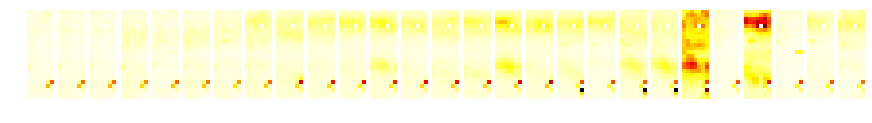

In [2]:
get_trial = csl.GetTrial(cut=Cut.parse('mid-2048'))
with Context(parallel=True):
    for gesture in range(27):
        trial = get_trial(csl.ROOT, csl.Combo(subject=1, gesture=gesture, trial=0))
        image = np.mean(np.abs(trial.data), axis=0).reshape(24, 7)
        plt.subplot(1, 27, gesture + 1)
        plt.imshow(image, cmap='hot_r', interpolation='nearest', vmin=0, vmax=0.0035)
        plt.axis('off')
    plt.gcf().set_size_inches(15, 3)

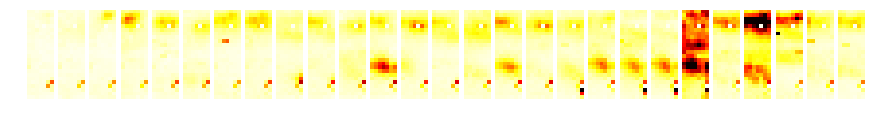

In [3]:
get_trial = csl.GetTrial(cut=Cut.parse('peak-256'))
with Context(parallel=True):
    for gesture in range(27):
        trial = get_trial(csl.ROOT, csl.Combo(subject=1, gesture=gesture, trial=0))
        image = np.mean(np.abs(trial.data), axis=0).reshape(24, 7)
        plt.subplot(1, 27, gesture + 1)
        plt.imshow(image, cmap='hot_r', interpolation='nearest', vmin=0, vmax=0.0035)
        plt.axis('off')
    plt.gcf().set_size_inches(15, 3)

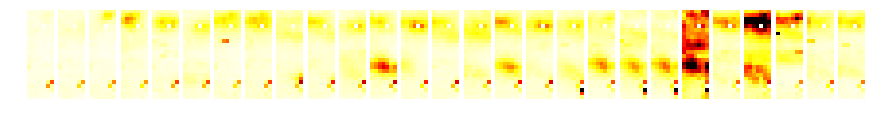

In [4]:
get_trial = csl.GetTrial(cut=Cut.parse('peak-512'))
with Context(parallel=True):
    for gesture in range(27):
        trial = get_trial(csl.ROOT, csl.Combo(subject=1, gesture=gesture, trial=0))
        image = np.mean(np.abs(trial.data), axis=0).reshape(24, 7)
        plt.subplot(1, 27, gesture + 1)
        plt.imshow(image, cmap='hot_r', interpolation='nearest', vmin=0, vmax=0.0035)
        plt.axis('off')
    plt.gcf().set_size_inches(15, 3)

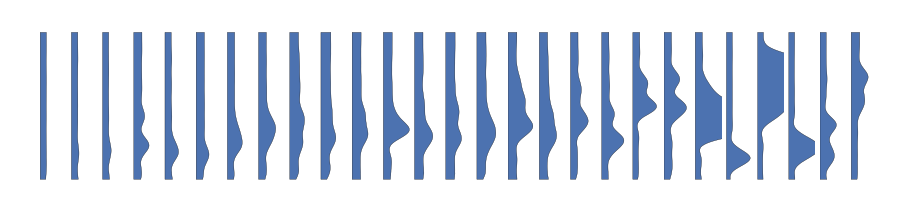

In [13]:
from sigr.utils import butter_lowpass_filter as lowpass
from scipy.ndimage.filters import median_filter


get_trial = csl.GetTrial()
with Context(parallel=True):
    for gesture in range(27):
        trial = get_trial(csl.ROOT, csl.Combo(subject=1, gesture=gesture, trial=0))
        data = np.abs(trial.data)
        data = np.transpose([lowpass(ch, 2, 2048, 4, zero_phase=True) for ch in data.T])
        data = np.array([median_filter(image, 3).mean() for image in data.reshape(-1, 24, 7)])
        #data = data.mean(axis=1)
        plt.subplot(1, 27, gesture + 1)
        plt.fill_betweenx(np.arange(len(data)), data)
        plt.xlim(0, 0.0005)
        plt.axis('off')
    plt.gcf().set_size_inches(15, 3)

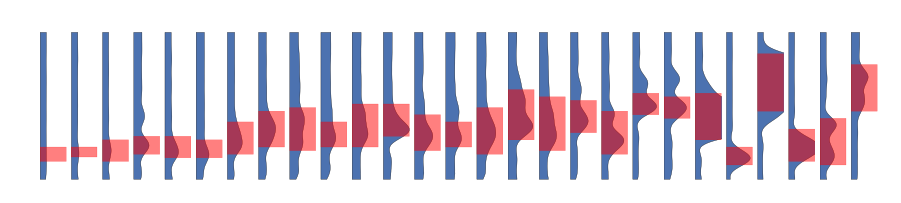

In [13]:
from sigr.utils import butter_lowpass_filter as lowpass
from scipy.ndimage.filters import median_filter
from sigr.data.cut import _csl_cut


get_trial = csl.GetTrial()
with Context(parallel=True):
    for gesture in range(27):
        trial = get_trial(csl.ROOT, csl.Combo(subject=1, gesture=gesture, trial=0))
        begin, end = _csl_cut(trial.data, 2048)
        data = np.abs(trial.data)
        data = np.transpose([lowpass(ch, 2, 2048, 4, zero_phase=True) for ch in data.T])
        data = np.array([median_filter(image, 3).mean() for image in data.reshape(-1, 24, 7)])
        #data = data.mean(axis=1)
        plt.subplot(1, 27, gesture + 1)
        plt.fill_betweenx(np.arange(len(data)), data)
        plt.fill_betweenx(np.arange(begin, end), 0.0005, color='r', alpha=0.5)
        plt.xlim(0, 0.0005)
        plt.axis('off')
    plt.gcf().set_size_inches(15, 3)

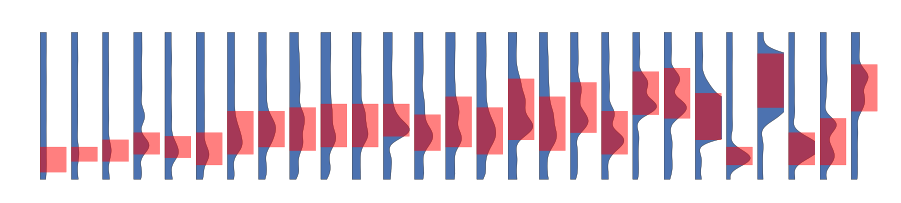

In [2]:
from sigr.utils import butter_lowpass_filter as lowpass
from scipy.ndimage.filters import median_filter
from sigr.data.preprocess import _csl_cut


get_trial = csl.GetTrial()
with Context(parallel=True):
    for gesture in range(27):
        trial = get_trial(csl.ROOT, csl.Combo(subject=1, gesture=gesture, trial=0))
        begin, end = _csl_cut(trial.data, 2048)
        data = np.abs(trial.data)
        data = np.transpose([lowpass(ch, 2, 2048, 4, zero_phase=True) for ch in data.T])
        data = np.array([median_filter(image, 3).mean() for image in data.reshape(-1, 24, 7)])
        #data = data.mean(axis=1)
        plt.subplot(1, 27, gesture + 1)
        plt.fill_betweenx(np.arange(len(data)), data)
        plt.fill_betweenx(np.arange(begin, end), 0.0005, color='r', alpha=0.5)
        plt.xlim(0, 0.0005)
        plt.axis('off')
    plt.gcf().set_size_inches(15, 3)

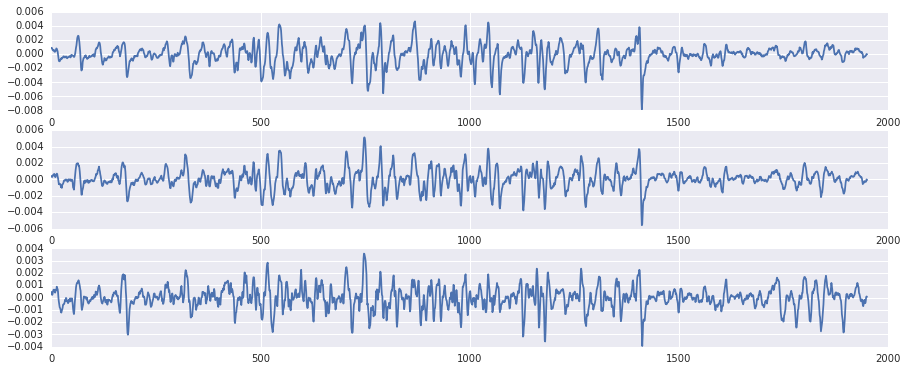

In [18]:
from sigr.utils import butter_lowpass_filter as lowpass
from scipy.ndimage.filters import median_filter
from sigr.data.preprocess import _csl_cut


get_trial = csl.GetTrial()
with Context(parallel=True):
    for gesture in [21]:
        trial = get_trial(csl.ROOT, csl.Combo(subject=1, gesture=gesture, trial=0))
        begin, end = _csl_cut(trial.data, 2048)
        plt.subplot(311)
        plt.plot(trial.data[begin:end, 1])
        plt.subplot(312)
        plt.plot(trial.data[begin:end, 0])
        plt.subplot(313)
        plt.plot(trial.data[begin:end, 7])
    plt.gcf().set_size_inches(15, 6)